In [94]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [106]:
import mps

In [361]:
reload(mps)

<module 'mps' from 'mps.pyc'>

In [375]:
octagon = mps.Polygon([
                   [-np.sqrt(2.)/2.,-np.sqrt(2.)/2.],
                   [0,-1.],
                   [np.sqrt(2.)/2.,-np.sqrt(2.)/2.],
                   [1.,0.],
                   [np.sqrt(2.)/2.,np.sqrt(2.)/2.],
                   [0.,1.],
                   [-np.sqrt(2.)/2.,np.sqrt(2.)/2.],
                   [-1.,0.]                   
                   ]).translate_by(np.sqrt(2.)/2.,np.sqrt(2.)/2.)

In [378]:
def plot_polygon(poly):
    edge_points = poly.edge_points(20)
    int_points = poly.find_interior_points(50)
    points = poly.bdry_pts + edge_points + int_points
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x,y)
    plt.axes().set_aspect('equal')
    plt.show()

[0.0, 0.0]
[0.70710678118654757, -0.29289321881345243]
[1.4142135623730951, 0.0]
[1.7071067811865475, 0.70710678118654757]
[1.4142135623730951, 1.4142135623730951]
[0.70710678118654757, 1.7071067811865475]
[0.0, 1.4142135623730951]
[-0.29289321881345243, 0.70710678118654757]


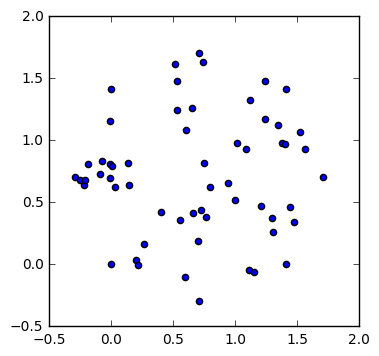

In [379]:
for p in octagon.bdry_pts:
    print p
plot_polygon(octagon)

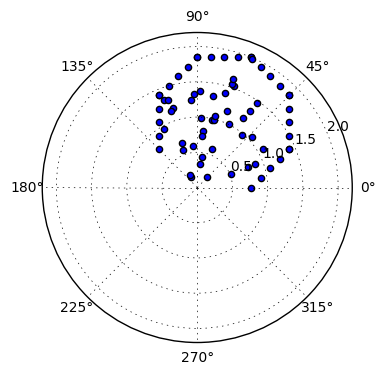

In [380]:
r, th = mps.to_polar(octagon, 0, 5, 40)
ax = plt.subplot(111, projection='polar')
ax.scatter(th, r)
ax.grid(True)
plt.show()

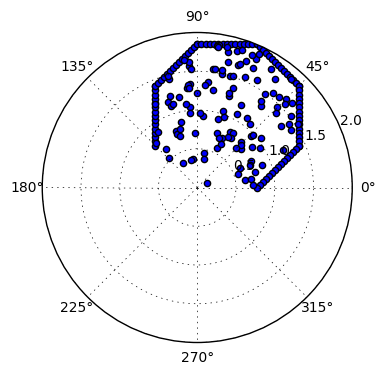

1.57246714139


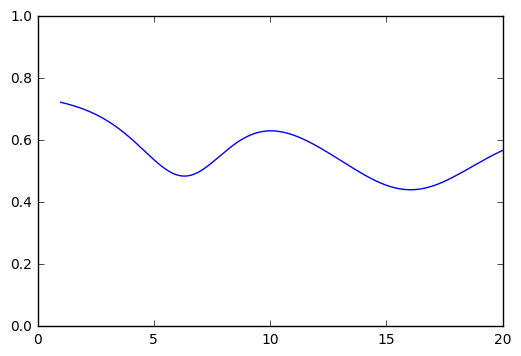

In [404]:
sings = []
lams = np.arange(1, 20, 0.005)
N = 15
num_pts_per_edge = N
num_bdy_pts = 8*N
num_int_pts = 8*N
ks = np.arange(1,N).reshape(N-1,1)
Tlist = []
rs, thetas = mps.to_polar(octagon, 0, num_pts_per_edge, num_int_pts, plot=True)
angle = mps.compute_angle(octagon, 0)
print angle
angle = 4./3.
for lam in lams:
    dat = mps.assemble_matrix(rs, thetas, angle, lam, ks, 6)
    T = dat['matrix']
    Tlist.append(T)
    sings.append(find_sing_val(T, num_bdy_pts))
#for k in range(len(lams)):
#    print lams[k], sings[k]
plt.plot(lams, sings)
plt.ylim([0,1])
plt.show()
tdict = dict(zip(lams,Tlist))

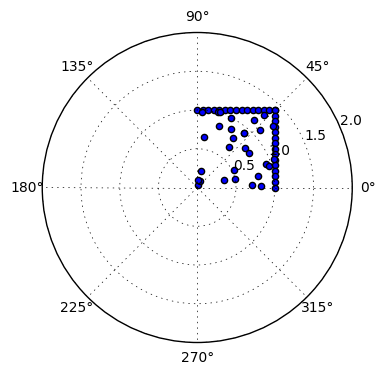

(60,)
(60,)


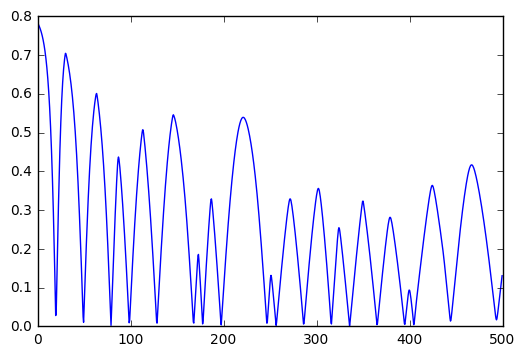

In [403]:
square = mps.Polygon([[0,0],[1,0],[1,1],[0,1]])
sings = []
lams = np.arange(1, 500, 0.5)
N = 15
num_pts_per_edge = N
num_bdy_pts = 2*N
num_int_pts = 2*N
ks = np.arange(1,N).reshape(N-1,1)
Tlist = []
rs, thetas = mps.to_polar(square, 0, num_pts_per_edge, num_int_pts, plot=True)
print rs.shape
print thetas.shape
angle = mps.compute_angle(square, 0)
for lam in lams:
    dat = mps.assemble_matrix(rs, thetas, 2, lam, ks, 2)
    T = dat['matrix']
    Tlist.append(T)
    sings.append(find_sing_val(T, num_bdy_pts))
#for k in range(len(lams)):
#    print lams[k], sings[k]
plt.plot(lams, sings)
plt.show()
tdict = dict(zip(lams,Tlist))

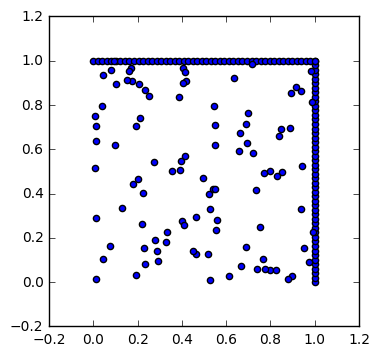

[19.5, 49.5, 79.0, 98.5]
[19.739208802178716, 49.34802200544679, 49.34802200544679, 78.95683520871486, 98.69604401089359, 98.69604401089359, 128.30485721416164, 128.30485721416164, 167.7832748185191, 167.7832748185191, 177.65287921960845, 197.39208802178717, 197.39208802178717, 246.74011002723395, 246.74011002723395, 315.82734083485946]


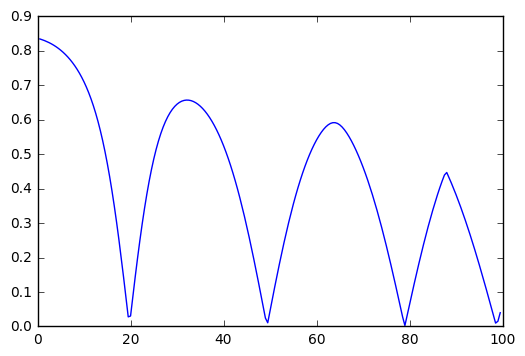

In [391]:
sq_lams, sq_sings, alist = mps.compute_square_eigenvalues(write_out=False)
plt.plot(sq_lams, sq_sings)
plt.show()
adict = dict(zip(sq_lams,alist))